In [1]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
# Descargar las stopwords de NLTK si es la primera vez que lo usas
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Miguel
[nltk_data]     Oscar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
# Cargar las stopwords en español 
stop_words = set(stopwords.words('spanish'))  # Se puede cambiar 'spanish' por 'english'

In [18]:
set(['soporte', 'usuario', 'inscomexico', 'hola','muchas', 'com', 'solo', 'usted', 'ustedes', 'buenas', 'tarde', 'asi', 'mas', 'tardes', 'gracia', 'dia', 'gracias', 'buenos', 'puede', 'favor', 'si', 'claro', 'dias', 'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para',
    'con', 'no', 'una', 'su', 'al', 'es', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya',
    'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también',
    'me', 'hasta', 'donde', 'quien', 'qué', 'unos', 'les', 'ni', 'nos', 'mi', 'cual', 'se', 'este'])

{'a',
 'al',
 'asi',
 'buenas',
 'buenos',
 'claro',
 'com',
 'como',
 'con',
 'cual',
 'cuando',
 'de',
 'del',
 'dia',
 'dias',
 'donde',
 'el',
 'en',
 'entre',
 'es',
 'esta',
 'este',
 'favor',
 'gracia',
 'gracias',
 'hasta',
 'hola',
 'inscomexico',
 'la',
 'las',
 'le',
 'les',
 'lo',
 'los',
 'mas',
 'me',
 'mi',
 'muchas',
 'muy',
 'más',
 'ni',
 'no',
 'nos',
 'o',
 'para',
 'pero',
 'por',
 'porque',
 'puede',
 'que',
 'quien',
 'qué',
 'se',
 'si',
 'sin',
 'sobre',
 'solo',
 'soporte',
 'su',
 'sus',
 'sí',
 'también',
 'tarde',
 'tardes',
 'un',
 'una',
 'unos',
 'usted',
 'ustedes',
 'usuario',
 'y',
 'ya'}

In [ ]:
# Agregar stopwords adicionales que consideres innecesarias
custom_stopwords = {a, al, asi, buenas, buenos, claro, com, como, con, cual, cuando, de, del, despues, después, dia, dias, día, días, donde, dos, el, embargo, en, encuesta, entre, es, esta, este, favor, gracia, gracias, gustaria, hasta, hola, inscomexico, la, las, le, les, lo, los, mas, me, mi, misma, muchas, muy, más, ni, ninguno, no, nos, o, para, patrones, pero, por, porque, puede, que, quien, qué, se, si, sin, sobre, solo, soporte, su, sus, sí, también, tarde, tardes, un, una, unos, usted, ustedes, usuario, y, ya} # Añade más palabras aquí si es necesario
stop_words.update(custom_stopwords)

In [23]:
custom_stopwords = {'a', 'al', 'asi', 'buenas', 'buenos', 'claro', 'com', 'como', 'con', 'cual', 'cuando', 'de', 'del', 'despues', 
                    'después', 'dia', 'dias', 'donde', 'dos', 'el', 'embargo', 'en', 'encuesta', 'entre', 'es', 'esta', 'este', 
                    'favor', 'gracia', 'gracias', 'gustaria', 'hasta', 'hola', 'inscomexico', 'la', 'las', 'le', 'les', 'lo', 'los', 
                    'mas', 'me', 'mi', 'misma', 'muchas', 'muy', 'más', 'ni', 'ninguno', 'no', 'nos', 'o', 'para', 'patrones', 
                    'pero', 'por', 'porque', 'puede', 'que', 'quien', 'qué', 'se', 'si', 'sin', 'sobre', 'solo', 'soporte', 'su', 
                    'sus', 'sí', 'también', 'tarde', 'tardes', 'un', 'una', 'unos', 'usted', 'ustedes', 'usuario', 'y', 'ya', 'día', 
                    'días'} 
stop_words.update(custom_stopwords)

In [30]:
custom_aw = {'trabajo', 'empresa', 'empleados', 'empleo', 'emplead', 'empleada', 'empleadas', 'empleados', 'empleadoss', 
             'empleadoss', 'empresa', 'empresas', 'emplead', 'empleada', 'empleadas', 'empleados', 'empleadoss', 'empleadoss',
             'empresa', 'area', 'personal', 'condiciones', 'laboral', 'general', 'generales', 'considero'
             }
stop_words.update(custom_aw)

In [24]:
import pandas as pd
url = 'https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/processed/texto.csv'
texto = pd.read_csv(url)
columnas = texto.select_dtypes(include='object').columns.tolist()

In [25]:
texto_completo = ""
for col in columnas:
    texto_col = ' '.join(texto[col].dropna().astype(str).to_list())
    texto_completo += texto_col + " "

In [26]:
import re

#Limpieza básica adicional (eliminar caracteres especiales, etc.)
texto_limpio = re.sub(r'[^a-zA-Z0-9\s]', '', texto_completo) # Ejemplo: solo letras, números y espacios
texto_limpio = texto_limpio.lower() # Convertir todo a minúsculas

In [27]:
texto_final_para_wc = texto_completo.lower()

In [31]:
# Crear la nube de palabras eliminando las stopwords
wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=150).generate(texto_final_para_wc)



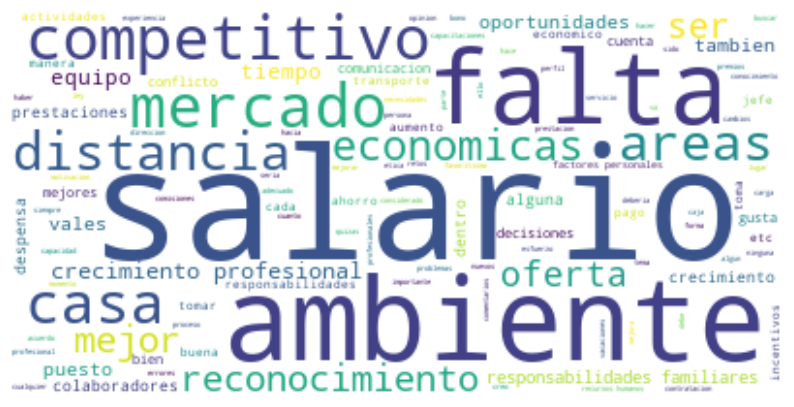

In [32]:
# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Quitar los ejes
plt.show()